In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
null_values = ['\\N']

In [3]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv',parse_dates=["created_at", "Working Date"], low_memory=False,na_values=null_values)

In [4]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,NaN,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,NaN,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,NaN,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,NaN,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [5]:
data = df.iloc[:,:-5]

In [6]:
data.shape

(1048575, 21)

In [7]:
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [8]:
ecommerce = data[['status','created_at','sku','price','qty_ordered','grand_total','category_name_1','discount_amount','payment_method','Working Date','Year','Month','Customer Since']]

In [9]:
ecommerce.head()

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since
0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7
1,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7
2,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7
3,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7
4,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7


In [10]:
ecommerce.dtypes

status                     object
created_at         datetime64[ns]
sku                        object
price                     float64
qty_ordered               float64
grand_total               float64
category_name_1            object
discount_amount           float64
payment_method             object
Working Date       datetime64[ns]
Year                      float64
Month                     float64
Customer Since             object
dtype: object

In [11]:
ecommerce = ecommerce.dropna(how='all')

In [12]:
ecommerce['Year'] = ecommerce['Year'].astype(int)

Check for null values in dataset

In [13]:
ecommerce.isnull().sum()

status               19
created_at            0
sku                  20
price                 0
qty_ordered           0
grand_total           0
category_name_1    8014
discount_amount       0
payment_method        0
Working Date          0
Year                  0
Month                 0
Customer Since       11
dtype: int64

***Best selling category with respect to year
 

In [14]:
most_selling_category = ecommerce.groupby('Year')['category_name_1'].value_counts().reset_index(name='No of Orders').sort_values(['Year','No of Orders'],ascending=False)

In [15]:
most_selling_category.columns

Index(['Year', 'category_name_1', 'No of Orders'], dtype='object')

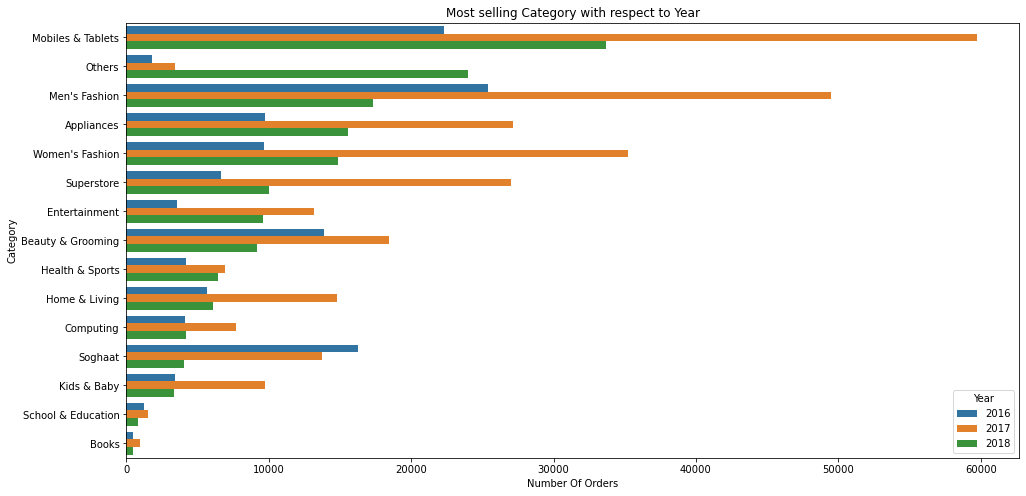

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(y='category_name_1',x='No of Orders',hue = 'Year',data=most_selling_category)
plt.xlabel('Number Of Orders')
plt.ylabel('Category')
plt.title('Most selling Category with respect to Year')
plt.show()

In [17]:
pmethod_orders = ecommerce.groupby('payment_method')['status'].size().reset_index(name='No of Orders').sort_values('No of Orders',ascending=False)

In [18]:
pmethod_orders.set_index('payment_method',inplace=True)

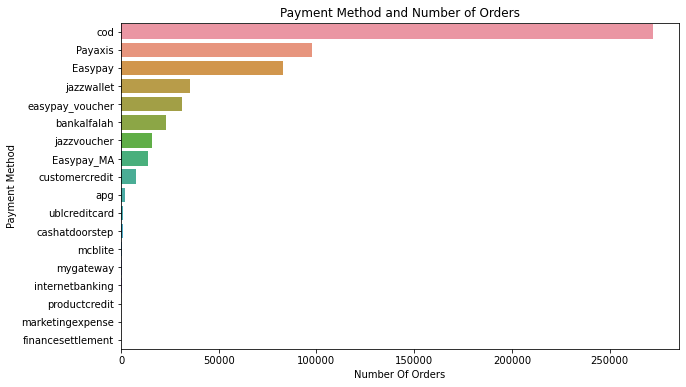

In [19]:
plt.figure(figsize=(10,6))

sns.barplot(y=pmethod_orders.index,x=pmethod_orders['No of Orders'])
plt.xlabel('Number Of Orders')
plt.ylabel('Payment Method')
plt.title('Payment Method and Number of Orders')
plt.show()

In [20]:
pmethod_orders

,No of Orders
payment_method,
cod,271960
Payaxis,97641
Easypay,82900
jazzwallet,35145
easypay_voucher,31176
bankalfalah,23065
jazzvoucher,15633
Easypay_MA,14028
customercredit,7555


In [21]:
pmethod_correlation = ecommerce.groupby('payment_method')['status'].value_counts().reset_index(name='No of Orders').sort_values('No of Orders',ascending=False)

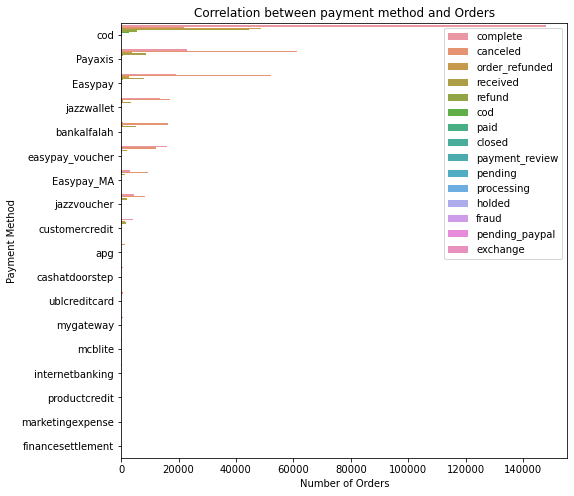

In [22]:
# pmethod_correlation.head()

plt.figure(figsize=(8,8))
sns.barplot(y='payment_method',x='No of Orders',hue = 'status',data=pmethod_correlation)
plt.xlabel('Number of Orders')
plt.ylabel('Payment Method')
plt.title('Correlation between payment method and Orders')
plt.legend()

In [33]:
month_category_correlation = ecommerce.groupby(['Month'])['category_name_1'].value_counts().reset_index(name='No of Orders').sort_values('No of Orders',ascending=False)

In [36]:
month_category_correlation.head(1)

,Month,category_name_1,No of Orders
150,11.0,Men's Fashion,32075


<Figure size 1152x576 with 0 Axes>

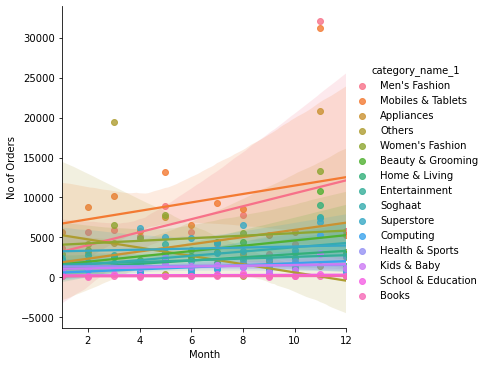

In [37]:
plt.figure(figsize=(16,8))
sns.lmplot(x='Month',y='No of Orders',hue='category_name_1',data=month_category_correlation)
plt.show()

In future, we will focus on try to improve graphs and try to forcast no of orders for each of category till then :)